# EDA

In [1]:
import pandas as pd
import pickle
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
text_data = pd.read_pickle('dtm.pkl')
text_data = text_data.transpose() #Easier to work with the words as rows
text_data.head()

,1,2,3,4,5,6,7,8,9,10,...,4509,4514,4515,4516,4517,4518,4519,4520,4522,4523
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaevgncl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aakiydertvy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(text_data)

6821

In [4]:
text = text_data[:6820] #removing the Permalinks row

In [5]:
text

,1,2,3,4,5,6,7,8,9,10,...,4509,4514,4515,4516,4517,4518,4519,4520,4522,4523
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaevgncl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aakiydertvy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuckerbergs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zux,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuyubaetw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
text['total'] = text.sum(axis = 1) #counting how many times the word was used across all text

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
text

,1,2,3,4,5,6,7,8,9,10,...,4514,4515,4516,4517,4518,4519,4520,4522,4523,total
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
aaaaaevgncl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
aakiydertvy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
zuckerbergs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
zux,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
zuyubaetw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [8]:
text.sort_values(by = ['total'], ascending = False)[:30] #top 30 words used

,1,2,3,4,5,6,7,8,9,10,...,4514,4515,4516,4517,4518,4519,4520,4522,4523,total
people,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,424.0
like,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,243.0
mask,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,191.0
business,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,163.0
need,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,163.0
going,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,133.0
right,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.0
want,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,119.0
new,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117.0
law,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,115.0


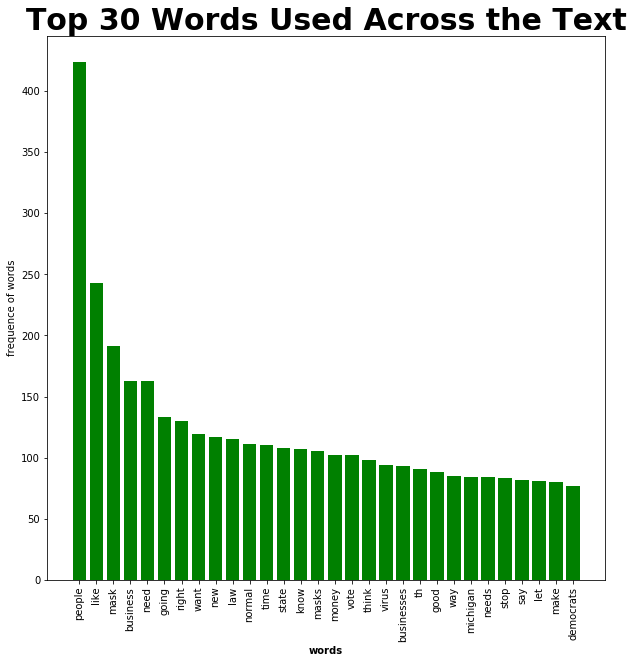

In [11]:
plt.figure(figsize=(10,10))
top_text = text.sort_values(by = ['total'], ascending = False)[:30]
plt.bar(top_text.index, top_text.total, color = 'green')
plt.xticks(rotation=90)
plt.title('Top 30 Words Used Across the Text', weight = 'bold', fontsize = 30)
plt.xlabel('words', weight = 'bold')
plt.ylabel('frequence of words');

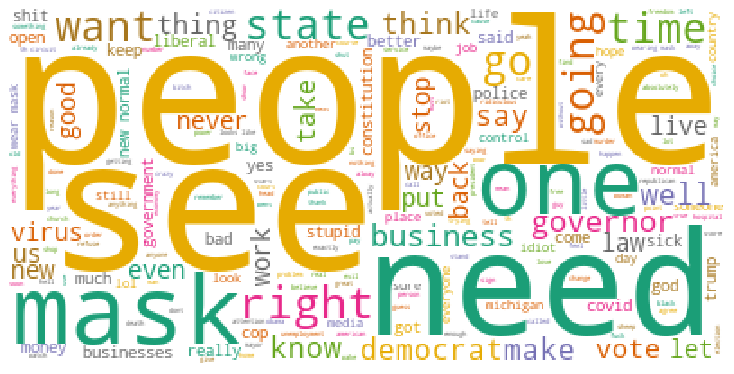

In [12]:
#Word Cloud of words used across all the posts and comments
all_text = pd.read_pickle('all_text_clean.pkl')

all_text_combined = " ".join(post for post in all_text.text)

stopwords = set(STOPWORDS)
wc = WordCloud(stopwords = stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(all_text_combined)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0)